array([ 5.23737977e+01,  6.65860874e+00,  9.96362594e+00,  9.81196855e+00,
       -1.44817492e+00,  9.99589440e+05])

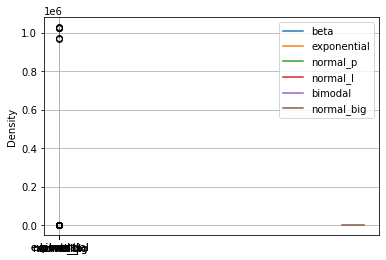

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})


# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal


# hiển thị dữ liệu
df.head()

sns.kdeplot(data=df)

df.describe()

normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)


# trực quan hóa bằng biểu đồ box plot
df.boxplot()


# Khai báo đối tượng MinMaxScaler
scaler = RobustScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

df_s.head()

# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

# thống kê về dữ liệu được sinh ra
df_s.describe()

df_s.boxplot()

# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

